In [99]:
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git
#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math
import pandas as pd
import hw3_ca as hw


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

In [100]:
def train_test_data(noise, kind):
    '''
    get train and test datasets
    inputs: 
    noise(float): 0-1 noise
    kind(string): can be "random","andSplit","xorSplit","targetSplit","multiBlobs"
    '''
    
    if kind == "random":
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
    elif kind == "andSplit":
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
    elif kind == "xorSplit":
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise))
    elif kind == "targetSplit":
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
    else:
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))
    return dfTrain, dfTest


clfs = {'RF': sklearn.ensemble.RandomForestClassifier(),
        'LR': sklearn.linear_model.LogisticRegression(),
        'SVM_l': sklearn.svm.SVC(kernel = 'linear', probability = True),
        'SVM_p': sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True),
        'GB': sklearn.ensemble.GradientBoostingClassifier(),
        'NB': sklearn.naive_bayes.GaussianNB(),
        'DT': sklearn.tree.DecisionTreeClassifier(),
        #'SGD': SGDClassifier(loss="hinge", penalty="l2"),
        'KNN': sklearn.neighbors.KNeighborsClassifier(n_neighbors=3),
        'NN': sklearn.neural_network.MLPClassifier(),
        'BAG': sklearn.ensemble.BaggingClassifier(sklearn.tree.DecisionTreeClassifier(), max_samples= 0.5, n_estimators = 20) ,
        'AB': sklearn.ensemble.AdaBoostClassifier(sklearn.tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)
            }

real_data = {'reddit': lucem_illud_2020.loadReddit(),
            'news': lucem_illud_2020.loadNewsGroups(),
            'senate_s': lucem_illud_2020.loadSenateSmall(),
            'senate_l': lucem_illud_2020.loadSenateLarge(),
            'spam':lucem_illud_2020.loadSpam()}



def classify(models_to_run, clfs, dfTrain, dfTest,label,feature_lst):
    results_df =  pd.DataFrame()
    for index,clf in clfs.items():
        if index in models_to_run:
            clf.fit(np.stack(dfTrain[feature_lst], axis=0), dfTrain[label])
            eval_df = lucem_illud_2020.evaluateClassifier(clf, dfTest)
            eval_df['model_type'] = "{}".format(index)
            eval_df['noise'] = noise
            results_df = results_df.append(eval_df)
    return results_df
        

Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors


KeyboardInterrupt: 

In [63]:
noises = [.2,.8]

kinds = ["random","andSplit","xorSplit","targetSplit","multiBlobs"]


models_to_run = ['RF','LR','SVM_l','SVM_p','GB',
                'NB','DT','NN']

df_total = pd.DataFrame()
for  noise in noises:
    for kind in kinds:
        dfTrain, dfTest = train_test_data(noise,kind)
        df_result = classify(models_to_run,clfs,dfTrain,dfTest,"category", "vect")
        df_total = df_total.append(df_result)

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOG

In [ ]:
df_total_real = pd.DataFrame()
for source, data in real_data.items():
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(data)
        df_result = classify(models_to_run,clfs,dfTrain,dfTest,"category", "vect")
        df_total_real = df_total.append(df_result)

In [39]:
#Collecting information for the next part
hm = pd.read_csv("https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/cleaned_hm.csv")
dem = pd.read_csv("https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/demographic.csv")
#Merging demographic information with the text we care to analyze
hm = hm.merge(dem,on = "wid")
hm = hm.sample(frac=.2).reset_index(drop=True)


(20107, 14)


### Exercise 2
Here, we will use the database of happy moments (https://www.megagon.ai/projects/happydb-a-happiness-database-of-100000-happy-moments/) where around 100,000 descriptions of happy moments were collected. We have the chance to take a look at how people describe happiness, and analyze it. One of the demographic variables that we can use as an indirect classification is wether the person is a parent or not. For the following examples, we will see wether we can predict if a person is a parent based on how they describe their happy moments (hm). For this exercise we will use a shuffled sample of the bigger dataset that will have 20,000 observations (of course, this won't be done for the final project).

In [40]:
#Creating our target variable as a binary one
hm['category'] = [s == 'y' for s in hm['parenthood']]

#Tokenizing and normalizing the text we care about
hm['tokenized_text'] = hm['cleaned_hm'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
hm['normalized_text'] = hm['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

#Splitting the text into train and test
holdBackFraction = .2
train_df, test_df = lucem_illud_2020.trainTestSplit(hm, holdBackFraction=holdBackFraction)
print(len(train_df))
print(len(test_df))


16086
4021


Implementing the logistic regression

In [42]:
#Creating our tf-idf matrix so we can analyze our text samples. 
#Each column will be a word so each observation will have many,many columns.
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=600, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_df['cleaned_hm'])

train_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

We also perform dimentionality reduction because, even though we don't have more words (or variables, or columns) than rows (or documents, which in this case will be each phrase), we don't want to overfit the model.

In [43]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_df['vect'], axis=0))

In [44]:
train_df['pca'] = [r for r in reduced_data]

Visualizing our results of the PCA, to see how well its 2 first components differentiate between categories. It can be the case (most probably) that 2 components are not sufficient to make the classification, so we will use the first best k components.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


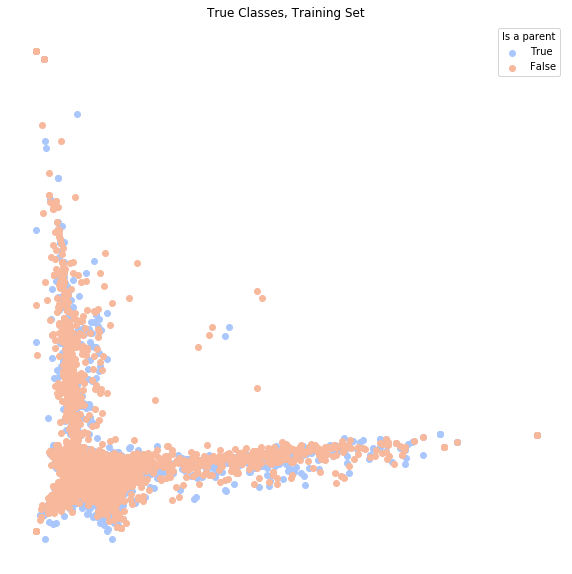

In [45]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot for being a parent
a = np.stack(train_df[train_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot for not being a parent
a = np.stack(train_df[train_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is a parent')
plt.title('True Classes, Training Set')
plt.show()

To determine how many k components we want to use, we have to check how much of the explained variance this first k components are capturing. We can see that k=100 is a reasonable measure, and adding more than that would be overfitting our model with not much gain from it.

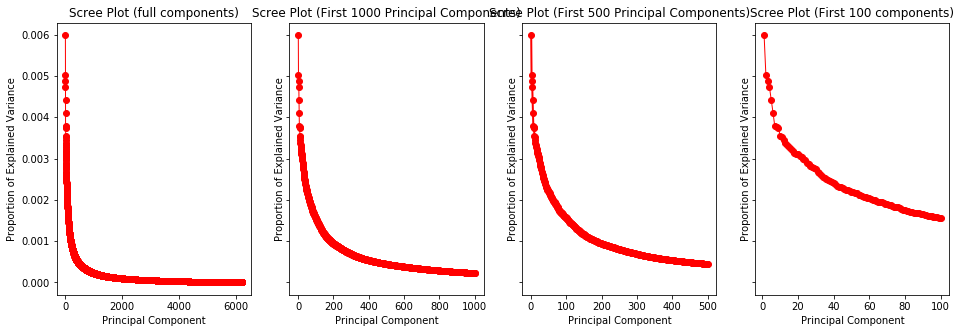

In [57]:
n = len(train_df)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize = (16, 5), sharey=True)
#Here i modify the range so it is not based on the length of columns but the length of rows, since the eigen vals will
#be equal to p columns if n>p.


eigen_vals = np.arange(6213) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (full components)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(1000) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:1000], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 1000 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(500) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:500], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 500 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(100) + 1
ax4.plot(eigen_vals, pca.explained_variance_ratio_[:100], 'ro-', linewidth=1)
ax4.set_title('Scree Plot (First 100 components)')
ax4.set_xlabel('Principal Component')
ax4.set_ylabel('Proportion of Explained Variance')

plt.show()

We see that the accuracy with the logistic regression is 68.8%. It's still a little low. 

In [64]:
train_df['pca_reduced_100'] = train_df['pca'].apply(lambda x: x[:100])

logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_df['pca_reduced_100'], axis=0), train_df['category'])

print(logistic.score(np.stack(train_df['pca_reduced_100'], axis=0), train_df['category']))



0.6880517219942808


In [67]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_df['cleaned_hm'])
test_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_df['vect'], axis=0))
test_df['pca'] = [r for r in reduced_data_test]
test_df['pca_reduced_100'] = test_df['pca'].apply(lambda x: x[:100])

#Test
logistic.score(np.stack(test_df['pca_reduced_100'], axis=0), test_df['category'])

0.6722208405869187

In [68]:
print("Training:")
print(logistic.score(np.stack(train_df['pca_reduced_100'], axis=0), train_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_df['pca_reduced_100'], axis=0), test_df['category']))

Training:
0.6880517219942808
Testing:
0.6722208405869187


We see no much difference between choosing 100 components from choosing 200 components!

In [71]:
train_df['pca_reduced_200'] = train_df['pca'].apply(lambda x: x[:200])
test_df['pca_reduced_200'] = test_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_df['pca_reduced_200'], axis=0), train_df['category'])

print("Training:")
print(logistic.score(np.stack(train_df['pca_reduced_200'], axis=0), train_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_df['pca_reduced_200'], axis=0), test_df['category']))

Training:
0.6989929130921299
Testing:
0.6861477244466551


Making the calculations with the logistic regression classifier, we see that we have more in-sample accuracy. 

## 2.1 Logistic Regression
We now take a look at the logistic regression results. Nevertheless, the previous section can be interpretedd as PCA results.

In [72]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_df['vect'], axis=0), train_df['category'])
print(logistic_l1.score(np.stack(train_df['vect'], axis=0), train_df['category']))

0.7611587716026358


In [91]:
print(logistic_l1.score(np.stack(test_df['vect'], axis=0), test_df['category']))
test_df['lr_predict'] = logistic_l1.predict(np.stack(test_df['vect'], axis=0))
print("precision with LR:")
print(sklearn.metrics.precision_score(test_df['category'],test_df['lr_predict']))
print("recall with LR:")
sklearn.metrics.recall_score(test_df['category'],test_df['lr_predict'])
print("F1 with LR:")
sklearn.metrics.f1_score(test_df['category'],test_df['lr_predict'])

0.6933598607311614
precision with LR:
0.7083854818523154
recall with LR:
F1 with LR:


0.478646934460888

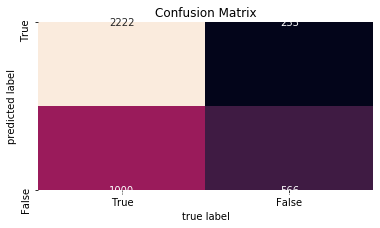

In [77]:
lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_df)

## 2.2. Naive Bayes classifier
We now train a Naive Bayes classifier for the task

In [78]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_df['vect'], axis=0), train_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [80]:
print("Training:")
print(naiveBayes.score(np.stack(train_df['vect'], axis=0), train_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_df['vect'], axis=0), test_df['category']))
test_df['nb_predict'] = naiveBayes.predict(np.stack(test_df['vect'], axis=0))
test_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_df['vect'], axis=0))[:,0]

Training:
0.7543205271664801
Testing:
0.6814225317085302


In [92]:
print("precision with NB:")
print(sklearn.metrics.precision_score(test_df['category'],test_df['nb_predict']))
print("recall with NB:")
print(sklearn.metrics.recall_score(test_df['category'],test_df['nb_predict']))
print("F1 with NB:")
print(sklearn.metrics.f1_score(test_df['category'],test_df['nb_predict']))

precision with NB:
0.658157602663707
recall with NB:
0.3786717752234994
F1 with NB:
0.48074584515606


This is for discussing my results

### Decision Trees

In [84]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(train_df['vect'], axis =0), train_df['category'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


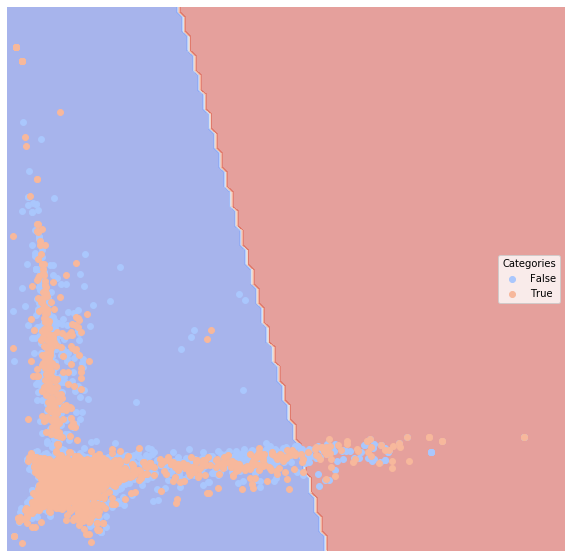

In [85]:
lucem_illud_2020.plotregions(clf_tree, train_df)

In [86]:
lucem_illud_2020.evaluateClassifier(clf_tree, train_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.314186,0.602472,0.664343,0.663290,0.980542
True,0.314186,0.602472,0.880476,0.499893,0.224402


In [87]:
sklearn.metrics.accuracy_score(test_df['category'],clf_tree.predict(np.stack(test_df['vect'], axis = 0)))

0.677692116388958

The following graph indicates that we may benefit from adding dephts to the tree, but this increase is actually not that high:It gets stucked at around 0.69 

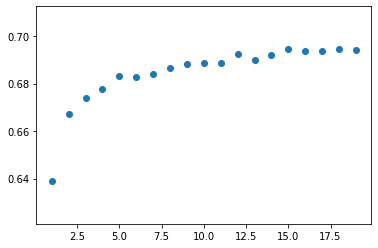

In [88]:
# depthvec = []
# scorevec = []
# for i in range(1,20):
#     tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
#     tree2.fit(np.stack(train_df['vect'], axis =0), train_df['category'])
#     score = sklearn.metrics.accuracy_score(test_df['category'], tree2.predict(np.stack(test_df['vect'], axis = 0)))
#     depthvec.append(i)
#     scorevec.append(score)
# plt.scatter(depthvec,scorevec)
# plt.show()

### Random Forests

In [89]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data


In [90]:
bag.fit(np.stack(train_df['vect'], axis =0), train_df['category']) 

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

In [ ]:
lucem_illud_2020.plotregions(bag, train_df)

In [ ]:
lucem_illud_2020.evaluateClassifier(bag, test_df)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(bag, test_df)

### K Nearest Neighbors

In [94]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [96]:
clf_knearest.fit(np.stack(train_df['vect'], axis = 0), train_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [98]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_df)

KeyboardInterrupt: 

In [ ]:
#Add to df
test_df['knn_predict'] = clf_knearest.predict(np.stack(test_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_df['vect'], axis=0), test_df['category']))

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_df)

### Exercise 5 : Neural Networks

In [ ]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_df['vect'], axis=0), train_df['category'])

Evaluating the results

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_df)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_df)

In [ ]:
lucem_illud_2020.plotregions(clf_nn, test_df)